## Predicting House Prices

In [1]:
# importing libraries
import pandas as pd

In [2]:
# loading dataset
housing = pd.read_csv("data.csv")

In [3]:
# taking a glance at the data
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
             by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [4]:
housing.shape

(506, 14)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
# Checking for duplicate data
print(housing.duplicated().sum())

0


In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

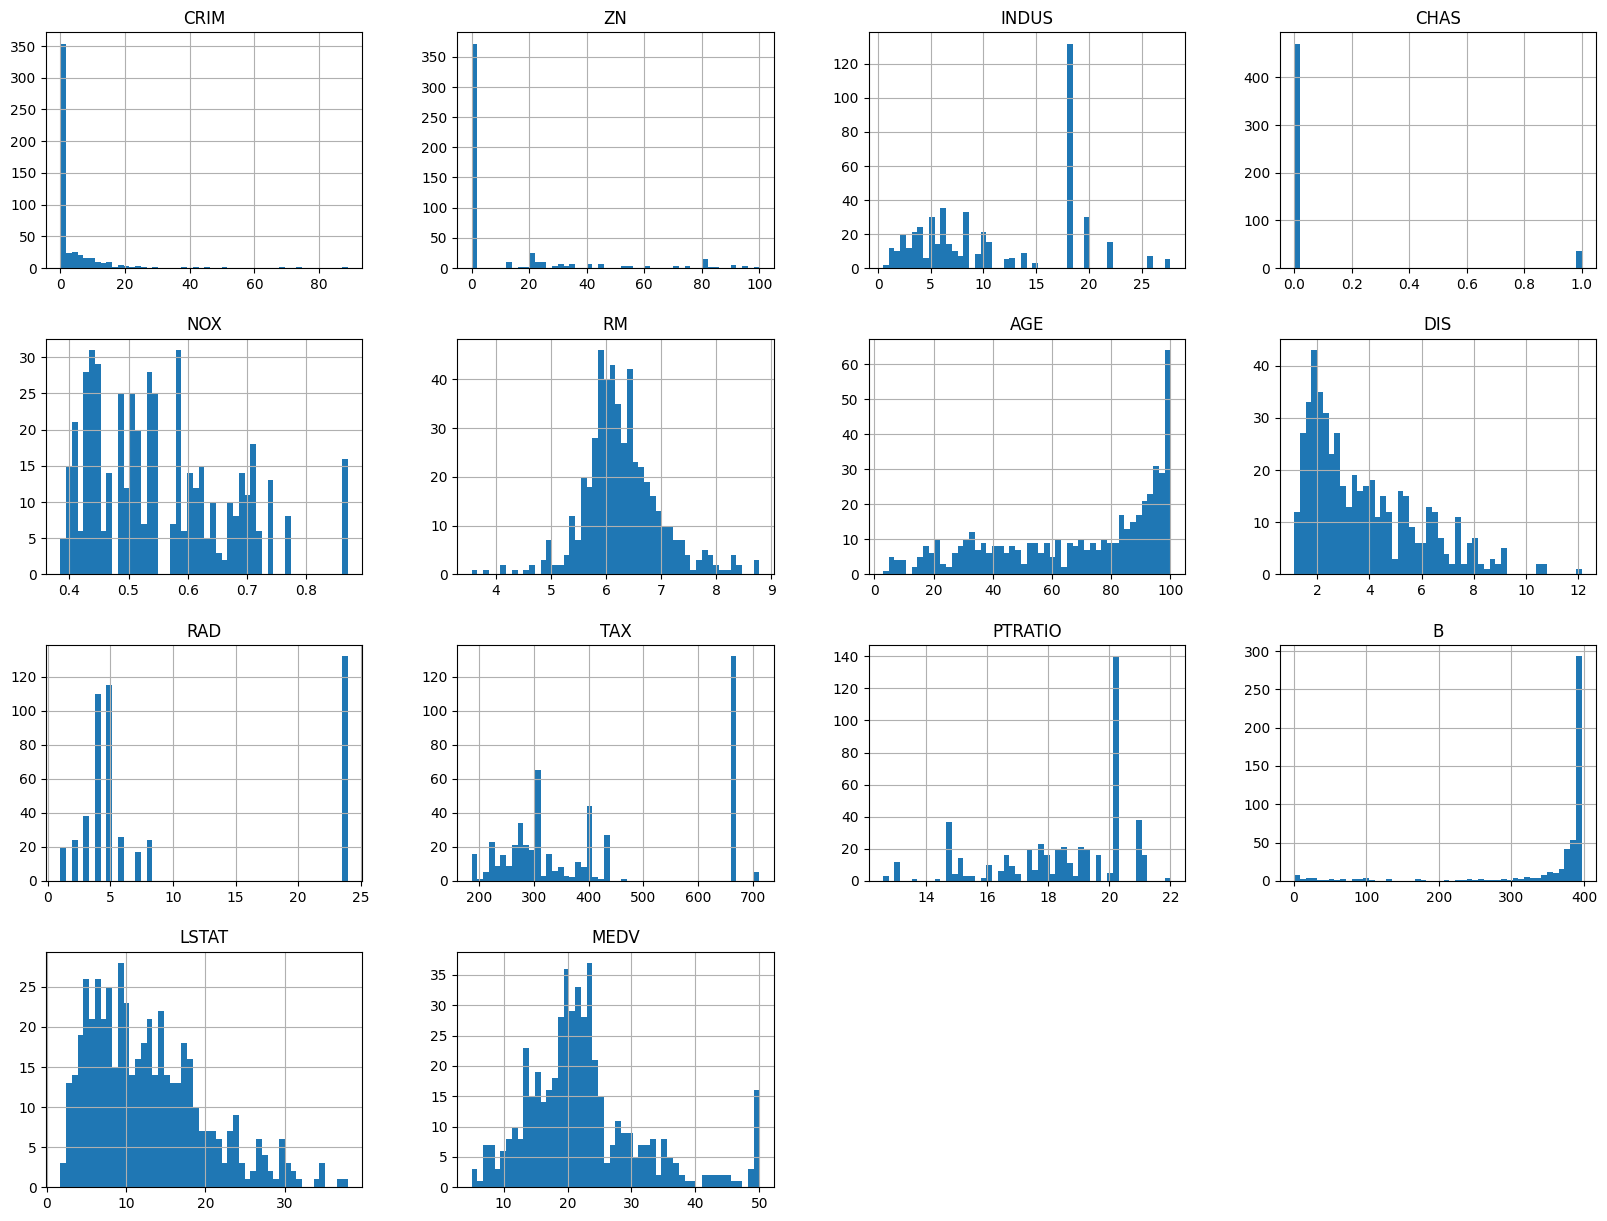

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

In [11]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Handling Missing Values

In [12]:
# looking for missing values
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
median = housing["RM"].median()

In [14]:
housing["RM"].fillna(median, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25724\782791009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["RM"].fillna(median, inplace=True)


In [15]:
# looking for missing values
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Handling Outliers

In [16]:
# looking for those attributes (columns) only that has more than 3% outliers

def calculate_iqr_outliers(data, numerical_columns, threshold=3):

  numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']

  for col in numerical_columns:
      
    # Calculating InterQuantile Range
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    # Calculating lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Counting outliers
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

    # Calculating and printing percentage (if above threshold)
    outlier_percentage = (outliers / len(data)) * 100
    if outlier_percentage > threshold:
      print(f"Column: {col} - Outlier Percentage: {outlier_percentage:.2f}%")

numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Calculating and printing IQR outliers with threshold of 3%
calculate_iqr_outliers(housing.copy(), numerical_columns.copy(), threshold=3)  # Avoid modifying original data

Column: CRIM - Outlier Percentage: 13.04%
Column: ZN - Outlier Percentage: 13.44%
Column: CHAS - Outlier Percentage: 6.92%
Column: RM - Outlier Percentage: 5.93%
Column: B - Outlier Percentage: 15.22%
Column: MEDV - Outlier Percentage: 7.91%


In [17]:
# We went for Winsorization i.e. replacing extreme outliers with values at the tails of the distribution
# This preserves data size while reducing the influence of outliers

def winsorize_dataframe(data, numerical_columns, percentile=90, lower_percentile=10):

  numerical_columns = numerical_columns[2:]

  winsorized_data = data.copy()

  for col in numerical_columns:
      
    # Calculating upper and lower bounds
    upper_bound = winsorized_data[col].quantile(percentile / 100)
    lower_bound = winsorized_data[col].quantile(lower_percentile / 100)

    # Cap outliers at bounds
    winsorized_data.loc[winsorized_data[col] > upper_bound, col] = upper_bound
    winsorized_data.loc[winsorized_data[col] < lower_bound, col] = lower_bound

  return winsorized_data

numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Winsorize data with default percentiles (90th and 10th)
winsorized_data = winsorize_dataframe(housing.copy(), numerical_columns.copy())

In [18]:
# checking for the further possible outliers
numerical_columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Calculate and print IQR outliers with threshold of more than 3%
calculate_iqr_outliers(winsorized_data.copy(), numerical_columns.copy(), threshold=3)  # Avoid modifying original data

Column: CRIM - Outlier Percentage: 13.04%
Column: ZN - Outlier Percentage: 13.44%
Column: B - Outlier Percentage: 15.22%


In [19]:
# we will simply drop the columns having outliers more than 5%
winsorized_data_dropped = winsorized_data.drop(['CRIM', 'ZN', 'B'], axis=1)

In [20]:
df = winsorized_data_dropped.copy()

  ## Train-Test Splitting

In [21]:
import numpy as np

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(df, housing['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [23]:
print(f"Rows in train set: {len(strat_train_set)}\nRows in test set: {len(strat_test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [24]:
strat_train_set['CHAS'].value_counts()

CHAS
0    404
Name: count, dtype: int64

In [25]:
strat_test_set['CHAS'].value_counts()

CHAS
0    102
Name: count, dtype: int64

In [26]:
housing = strat_train_set.copy()

## Looking For Correlations

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.700487
DIS        0.351025
RAD       -0.431351
AGE       -0.473573
PTRATIO   -0.498757
TAX       -0.523172
NOX       -0.531519
INDUS     -0.578281
LSTAT     -0.813247
CHAS            NaN
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

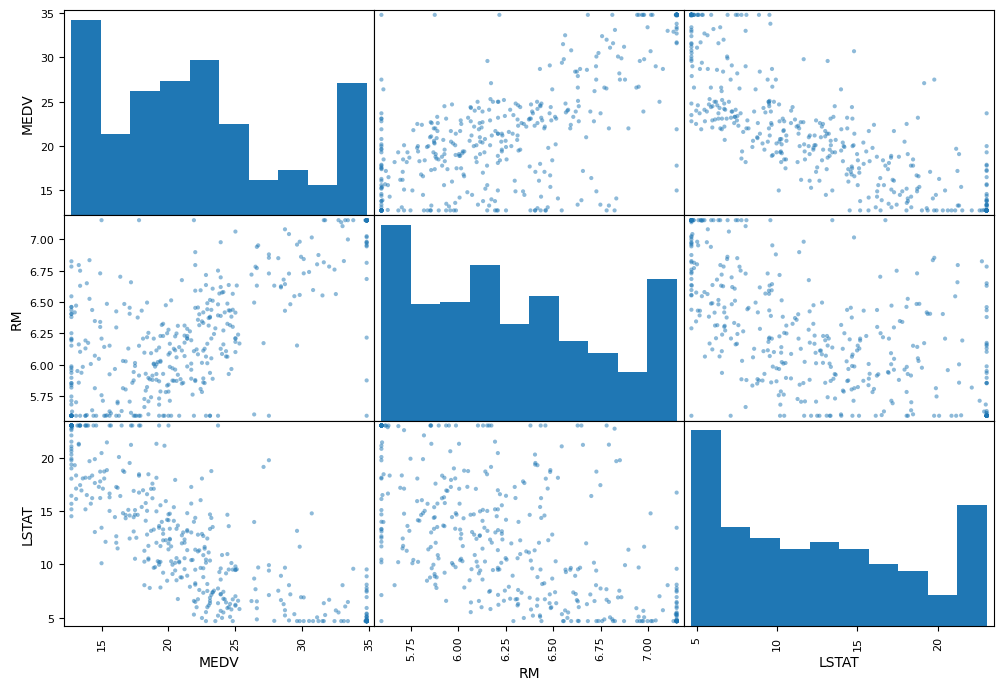

In [29]:
from pandas.plotting  import scatter_matrix
attributes = ["MEDV", "RM", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

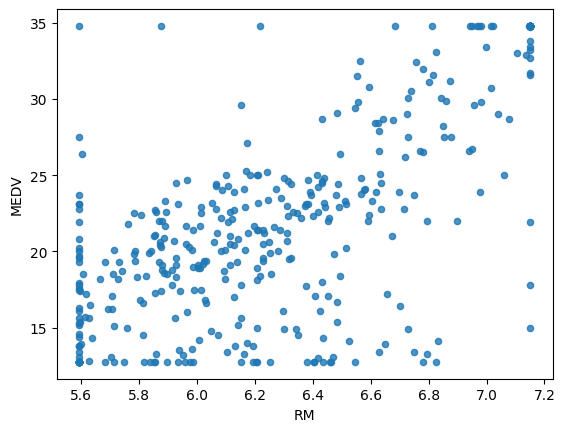

In [30]:
housing.plot(kind = "scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute Combinations

In [31]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [32]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      38.593302
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [33]:
housing.head()

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,TAXRM
254,3.64,0,0.427,6.108,32.0,6.8166,3,315,16.4,6.57,21.9,51.571709
348,2.91,0,0.435,6.635,29.7,6.8166,4,280,17.0,5.99,24.5,42.200452
476,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,18.68,16.7,102.714374
321,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,6.87,23.1,45.012547
326,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,6.15,23.0,45.468948


In [34]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.700487
DIS        0.351025
RAD       -0.431351
AGE       -0.473573
PTRATIO   -0.498757
TAX       -0.523172
NOX       -0.531519
INDUS     -0.578281
TAXRM     -0.595871
LSTAT     -0.813247
CHAS            NaN
Name: MEDV, dtype: float64

In [35]:
import seaborn as sns

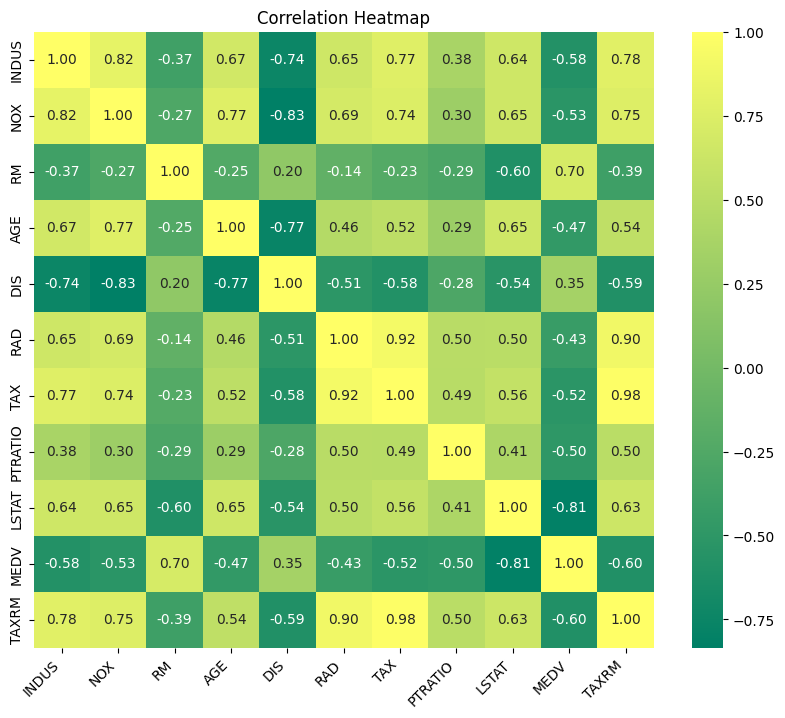

In [36]:
data = housing.drop('CHAS', axis=1)
corr_matrix = data.corr()

# Creating a heatmap to visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha="right")
plt.show()

In [37]:
# Separating features (X_train) and target variable (Y_train) from the training set
X_train = strat_train_set.drop('MEDV', axis=1)  # Features
Y_train = strat_train_set['MEDV'].copy()  # Target variable

In [38]:
# Separating features (X_test) and target variable (Y_test) from the testing set
X_test = strat_test_set.drop('MEDV', axis=1)  # Features
Y_test = strat_test_set['MEDV'].copy()  # Target variable

## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std scaler', StandardScaler())
])

In [40]:
# Passing training dataset into our pipeline to do scaling
X_tr = my_pipeline.fit_transform(X_train)

In [41]:
X_tr.shape

(404, 10)

In [42]:
Y_train.shape

(404,)

In [43]:
# Passing testing dataset into our pipeline
X_ts = my_pipeline.fit_transform(X_test)

In [44]:
X_ts.shape

(102, 10)

In [45]:
Y_test.shape

(102,)

## Selecting a desired model for Dragon Real Estates

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [47]:
# Using multiple models to find which gives best results
models={
    "Linear Regression":LinearRegression(),
    "Random Forest":RandomForestRegressor(),
    "Support Vector Machines":SVR(),
    "Lasso Regression":Lasso(alpha=0.2),
    "Ridge Regression":Ridge(alpha=1.5),
    "Decision Tree":DecisionTreeRegressor()
}
for i in range(len(list(models))):
    model = list(models.values())[i]

     # Training our model
    model.fit(X_tr, Y_train)

    # Making predictions
    Y_train_pred = model.predict(X_tr)

    # Training set performance
    mse = mean_squared_error(Y_train, Y_train_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

 
    print('Model performance for Training set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- RMSE: 3.0620


Random Forest
Model performance for Training set
- RMSE: 1.0029


Support Vector Machines
Model performance for Training set
- RMSE: 2.6827


Lasso Regression
Model performance for Training set
- RMSE: 3.2029


Ridge Regression
Model performance for Training set
- RMSE: 3.0624


Decision Tree
Model performance for Training set
- RMSE: 0.0774




## Using better evaluation technique - Cross Validation

In [48]:
# for better evaluation techniques we went for Cross_validation on training dataset having 10 folds
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
  # Perform cross-validation and calculate RMSE scores
  scores = cross_val_score(model, X_tr, Y_train, scoring="neg_mean_squared_error", cv=10)
  rmse_scores = np.sqrt(-scores)

  # Printing model name and average RMSE
  print(f"Model: {model_name}")
  print(f"Average RMSE: {rmse_scores.mean()}")
  print("-" * 30) 

Model: Linear Regression
Average RMSE: 3.1800903215541725
------------------------------
Model: Random Forest
Average RMSE: 2.590914298544952
------------------------------
Model: Support Vector Machines
Average RMSE: 2.8274196665184563
------------------------------
Model: Lasso Regression
Average RMSE: 3.3026146427569474
------------------------------
Model: Ridge Regression
Average RMSE: 3.177012277207692
------------------------------
Model: Decision Tree
Average RMSE: 3.4722716107037206
------------------------------


Thus, Decision Tree and Random Forest were overfitting the training dataset earlier

## Testing the model on test data

In [49]:
# Finally testing our model on Testing Dataset and evaluating it using evaluation metrics used earlier

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Make predictions
    Y_test_pred = model.predict(X_ts)

    # Testing set performance
    mse = mean_squared_error(Y_test, Y_test_pred)
    rmse = np.sqrt(mse)

    print(list(models.keys())[i])

 
    print('Model performance for Testing set')
    print("- RMSE: {:.4f}".format(rmse))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Testing set
- RMSE: 3.2066


Random Forest
Model performance for Testing set
- RMSE: 3.0361


Support Vector Machines
Model performance for Testing set
- RMSE: 2.8098


Lasso Regression
Model performance for Testing set
- RMSE: 3.3170


Ridge Regression
Model performance for Testing set
- RMSE: 3.2035


Decision Tree
Model performance for Testing set
- RMSE: 4.2312




So, looking at the performances of various models we can either go for Random Forest or Support Vector Machines to do house price prediction